## Make patches from labels

Make a set of augmented patches from labels.

The difference between labels and patches is:

1.  Labels are a set of images and annotated ground truths, generated manually, or automatically.  Labels can be different sizes.
2.  Patches are a set of images and annotated ground truths generated from labels.  They are usually cropped from labels to be all the same size.  They are often augmented.  1 label can be used to generate many patches. 

In the first cell we set up paths to the label images, and get a list of the file names of the labels

In [2]:
from skimage.io import imread
from pathlib import Path
from matplotlib import pyplot as plt
from tnia.plotting.plt_helper import imshow_multi2d
import numpy as np
from tnia.deeplearning.dl_helper import quantile_normalization
import json
from tnia.deeplearning.dl_helper import get_label_paths
from tnia.plotting.plt_helper import random_label_cmap
from glob import glob
import os

tnia_images_path = Path("D:/images")
parent_path = r'D:\images\tnia-python-images\imagesc\2024_09_29_training_cellpose'
parent_path = Path(parent_path)
label_path = Path(parent_path / r'labels')

# open the info file
#json_ = json.load(open(label_path / 'info.json'))
# get number of inputs and number of ground truths for this problem
#num_inputs = json_['num_inputs']
#num_ground_truths = json_['num_truths']

num_inputs = 1
num_ground_truths = 1

print('num inputs: ', num_inputs)   
print('num ground truth: ', num_ground_truths)

image_label_paths, ground_truths_label_paths = get_label_paths(1, num_ground_truths, label_path)
print('image label paths',image_label_paths)
print("ground_truth_label_paths", ground_truths_label_paths[0])

# get list of tif files in image_label_path
tif_files = glob(str(os.path.join(image_label_paths[0], '*.tif')))
print()
for tif_file in tif_files:
    print("tif_file: ", tif_file)


num inputs:  1
num ground truth:  1
image label paths [WindowsPath('D:/images/tnia-python-images/imagesc/2024_09_29_training_cellpose/labels/input0')]
ground_truth_label_paths D:\images\tnia-python-images\imagesc\2024_09_29_training_cellpose\labels\ground truth0

tif_file:  D:\images\tnia-python-images\imagesc\2024_09_29_training_cellpose\labels\input0\RSI_CD_6_A_1_T_0}RGB_B_DAPI_G_f480-1.tif


## Get one of the label/ground truth sets

tiff name is RSI_CD_6_A_1_T_0}RGB_B_DAPI_G_f480-1.tif


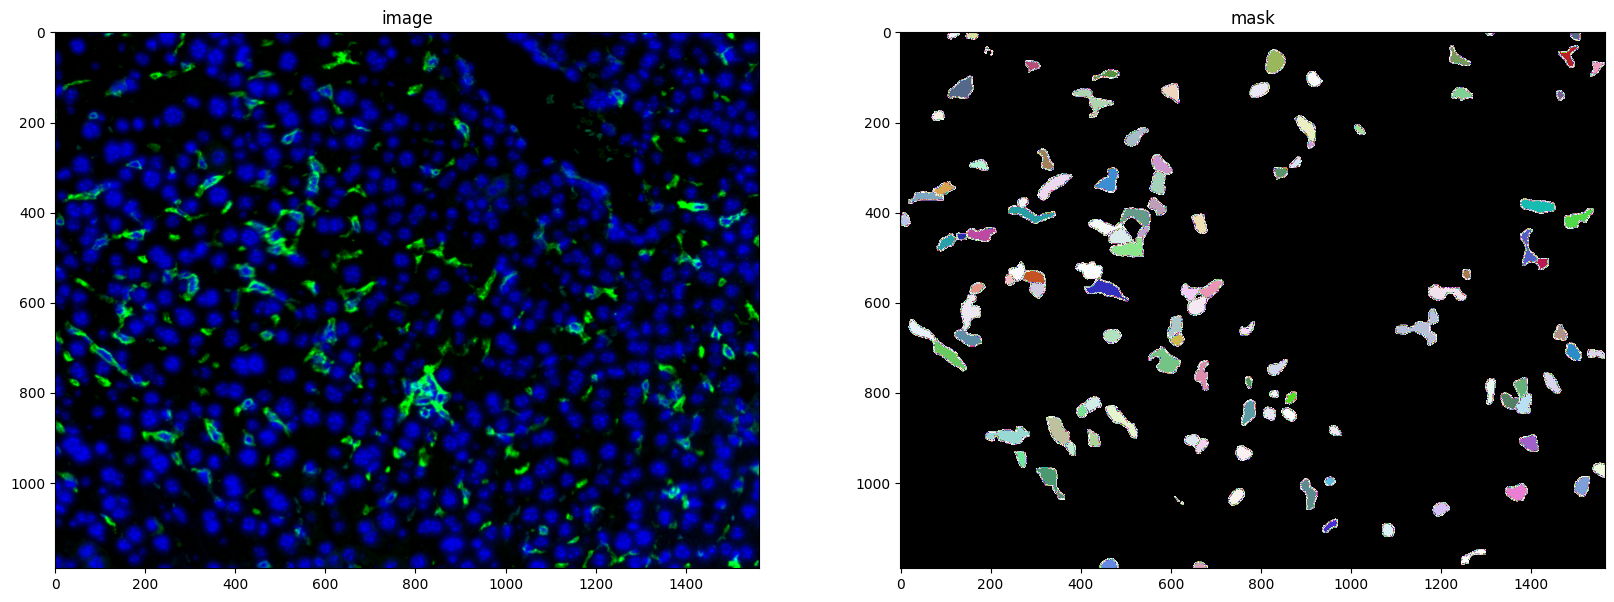

In [3]:
i=0

# get tif name
tif_name = os.path.basename(tif_files[i])
print('tiff name is', tif_name)

image = imread(str(image_label_paths[0]/ (tif_name)))

if image.dtype == np.uint16:
    image_to_show = (image-image.min())/(image.max()-image.min())
    image_to_show = (255*image_to_show).astype(np.uint8)
else:
    image_to_show = image

# read labels (there can be more than one class)
labels = []
for ground_truths_label_path in ground_truths_label_paths:
    label = imread(os.path.join(ground_truths_label_path / (tif_name)))
    labels.append(label)

# show labels image 
images_to_show=[]
titles = []
images_to_show.append(image_to_show)
titles.append("image")

for label in labels:
    images_to_show.append(label)
    titles.append("mask")

fig = imshow_multi2d(images_to_show, titles, 1, len(images_to_show), width=20, height=10, colormaps = ['gray', random_label_cmap()])


## Normalize image and make patches 

Normalization is always tricky.  We want to normalize based on the expected range in real images, which are often larger than training patches.  In this case we want to normalize first, then extract the patches, so that all patches are normalized based on the expected intensity range of full sized images (not intensity range of the patch)

In [4]:
import os
from tnia.deeplearning.augmentation import uber_augmenter
from skimage.measure import label
i=0

num_patches = 400

for i in range(len(tif_files)):
    # get tif name
    tif_name = os.path.basename(tif_files[i])
    print('tiff name is', tif_name)
    image = imread(str(image_label_paths[0]/ (tif_name)))
    image = quantile_normalization(image).astype(np.float32)
    print(image.shape)
    

    # read labels (there can be more than one class)
    labels = []
    for ground_truths_label_path in ground_truths_label_paths:
        label_ = imread(os.path.join(ground_truths_label_path / (tif_name)))
        label_ = label(label_).astype(np.uint16)
        labels.append(label_)


    patch_path= parent_path / 'patches' 

    if not os.path.exists(patch_path):
        os.mkdir(patch_path)
    axes = 'YXC'
    sub_sample = 1

    uber_augmenter(image, labels, patch_path, 'grid', 256, 400, do_random_gamma=True, do_elastic_transform=True)
    

tiff name is RSI_CD_6_A_1_T_0}RGB_B_DAPI_G_f480-1.tif
(1190, 1564, 3)


c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:224: UserWarning: D:\images\tnia-python-images\imagesc\2024_09_29_training_cellpose\patches\ground truth0\grid_0.tif is a low contrast image
  imsave(label_name, label_aug[j])
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:224: UserWarning: D:\images\tnia-python-images\imagesc\2024_09_29_training_cellpose\patches\ground truth0\grid_1.tif is a low contrast image
  imsave(label_name, label_aug[j])
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:224: UserWarning: D:\images\tnia-python-images\imagesc\2024_09_29_training_cellpose\patches\ground truth0\grid_2.tif is a low contrast image
  imsave(label_name, label_aug[j])
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:224: UserWarning: D:\images\tnia-python-images\imagesc\2024_09_29_training_cellpose\patches\ground truth0\grid_3.tif is a low contrast image
  i